# Which Plot Type Should I Use?

**This a _brief_ listing of common graphs and their functions**

The functions below are but a little tasting of common plots, and I'm not specifying parameters beyond the utterly necessary. `pd` and `sns` functions get their flexibility from the wide assortment of parameters you can alter. Changing the parameters a bit can produce large (and interesting!) alterations. For example, `col` and `hue` typically _**multiply**_ the amount of info in a graph.

You can either read the function's documentation (and I frequently do!) via `SHIFT+TAB` or look through the 
graph example galleries [here](https://www.data-to-viz.com) and [here](https://python-graph-gallery.com) until you see graphs with features you want, and then you can look at how they are made. 

```{tip}
I would absolutely bookmark these links:
- [data to viz](https://www.data-to-viz.com) 
- [py graph gallary](https://python-graph-gallery.com) 
- [seaborn gallery](https://seaborn.pydata.org/examples/index.html)
```

## Common plot functions

````{dropdown} Examining one variable

```{note}
Below, if I call something like `df['variable'].<someplottype>` that means we are using `pandas` built in plotting methods. Else, we call `sns` to use `seaborn`.
```

If the variable is called $x$ in the dataset,

| Graph | Code example | 
|:---|:---|
| frequency count | `df['x'].value_counts().plot.bar()      # built in pandas fnc` <br> `df['x'].value_counts()[:10].plot.bar() # only the top 10 values` <br> `sns.countplot(data=df, x='x')                ` |
| histogram |  `sns.displot(data=df, x='x')`   <br> `sns.displot(data=df, x='x',bins=15)    # lots of opts, one is num of bins` |
| KDE (Kernel density est.) | `sns.displot(data=df, x='x',kind='kde')`  <br> `sns.displot(data=df, x='x',kde=True)     # includes both kde and hist by default` |
| boxplot  | `sns.boxplot(x="x", data=df)` |

The `countplot`/bar graph counts frequency of values (# of times that value exists) within a variable, and is best when there are fewer possible values or when the variable is categorical instead of numerical (e.g. the color of a car). 

The others examine the distribution of values for numerical variables (not categorical) and also work on continuous variables or those with many values. 

````

````{dropdown} Examining one variable by group

If you want to examine $y$ for each group in $group$

| Graph | Code example | 
|:---|:---| 
| boxplot | `sns.boxplot(x="group",y="y", data=df)` |
| distplot | `sns.FacetGrid(temp_df, hue="group").map(sns.kdeplot, "y")` <br><br> `kdeplot` is the KDE plot portion of `distplot`. <br> FacetGrid is something we should defer talking about.... |
| violinplot | `sns.catplot(x="group",y="y", data=df, kind='violin')` <br> **`catplot`** can quickly plot many different types of categorical plots! |

```{tip}
Most functions accept some subset of `hue`, `row`, `col`, `style`, `size`. Each of these add [new facets](#faceting) to your graphs. Facets are ways of either repeating graphs for different subgroups or overlaying figures for different subgroups on each other.
```

````


````{dropdown} Examining two variables

| Graph | Code example | 
|:---|:---| 
| line | `sns.lineplot(x="x", y="y", data=df)` |
| scatterplot | `sns.scatterplot(x="x", y="y", data=df)` |
| scatter + density | `sns.jointplot(x="x", y="y", data=df)` |
| with fit line | `sns.jointplot(x="x", y="y", data=df,kind=reg) # regress to get fit` |
| hexbin | `sns.jointplot(x=x, y=y, kind="hex") # possibly better than scatter with larger data` |
| topograph | `sns.jointplot(x=x, y=y, kind="kde")   topo map with kde on sides` |
| pairwise scatter | `sns.pairplot(df[['x','y','z']])` <br>  `sns.pairplot(df[['x','y','z']],kind='reg) # add fit lines` |
````

````{dropdown} Examining two variables by group

| Graph | Code example | 
|:---|:---| 
| line | `sns.lineplot(x="x", y="y", data=df,hue='group')` |
| scatterplot | `sns.scatterplot(x="x", y="y", data=df,hue='group')` |
| pairplot | `sns.pairplot(df,hue='group')`

You will come across times where you think the relationship between $x$ and $y$ might on a third variable, $z$, or maybe even a fourth variable $w$. For example, age and income are related, but the relationship is different for college educated women than it is for high-school only men. 

If you want to examine the relationship of $x$ and $y$ for each group in $group$, you can do so using any two-way plot type (scatter and its cousins).

```{admonition} Hue vs Col
Some functions achieve the group analysis with a `hue` argument (give different groups different colors) and some do it with `col` (give different groups different subfigures).
```

````

## Faceting

**Facets** allow you to present more info on a graph by designing a plot for a subset of the data, and quickly repeating it for other parts. 

You can think of facets as either
1. creating subfigures 
    - the `pairplot` below creates subfigures for each combination of variables in the dataset
    - the [Anscombe example](04b-whyplot.html#summary-statistics-don-t-show-relationships)  makes subfigures for subsets of the data 
2. or overlaying figures on top of each other in a single figure
    - the categorical `boxplot` below does this for each sub group
    - the ["omitted group effects"](04b-whyplot.html#finding-group-effects) 

Let's look at some examples quickly:

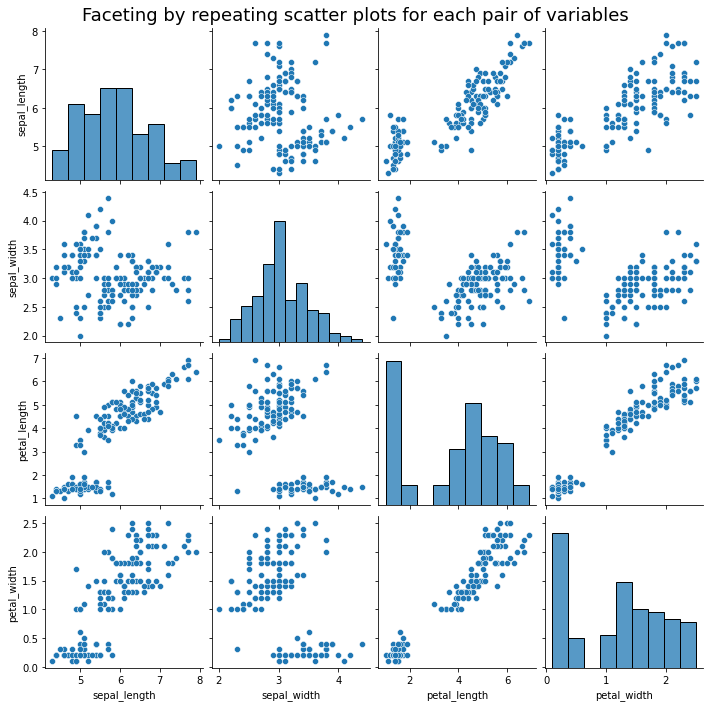

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

iris = sns.load_dataset("iris")
sns.pairplot(iris)
plt.suptitle('Faceting by repeating scatter plots for each pair of variables',fontsize=18)
plt.subplots_adjust(top=0.95) # Reduce plot to make room for the title
plt.show()

# note: .set(title) doesn't work here - it tries to title the individual subfigures (axes)
#       to title the whole thing, I had to use suptitle. 

This is the same, plus a `hue="species"` parameter in the graph function.

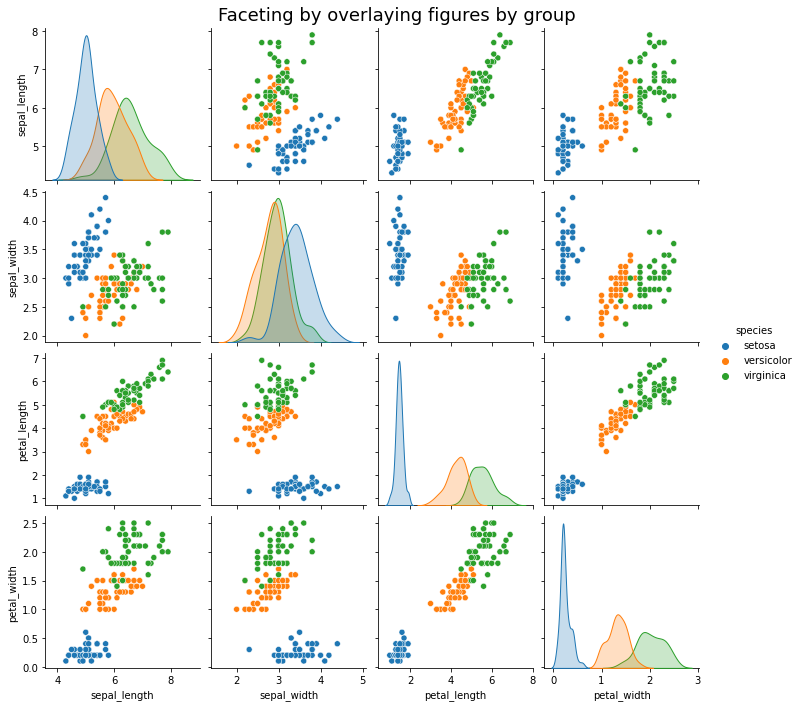

In [2]:
sns.pairplot(iris, hue="species")
plt.suptitle('Faceting by overlaying figures by group',fontsize=18)
plt.subplots_adjust(top=0.95) # Reduce plot to make room for the title 
plt.show()

Boxplot by group: Just use the `x` and `y` arguments together. 

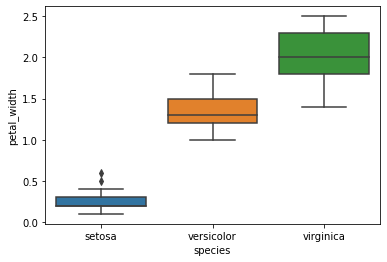

In [3]:
sns.boxplot(x="species",y="petal_width", data=iris,)
plt.show()

An example of faceting via the `col` argument. Using `row` instead does what you'd think. Protip: You can use `row` and `col` together to make a grid of groups. 


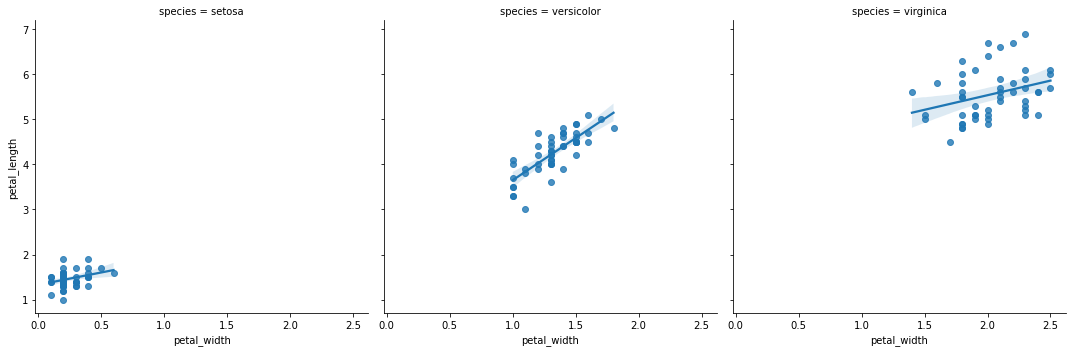

In [4]:
sns.lmplot(data=iris,x='petal_width',y="petal_length",col="species")
plt.show()

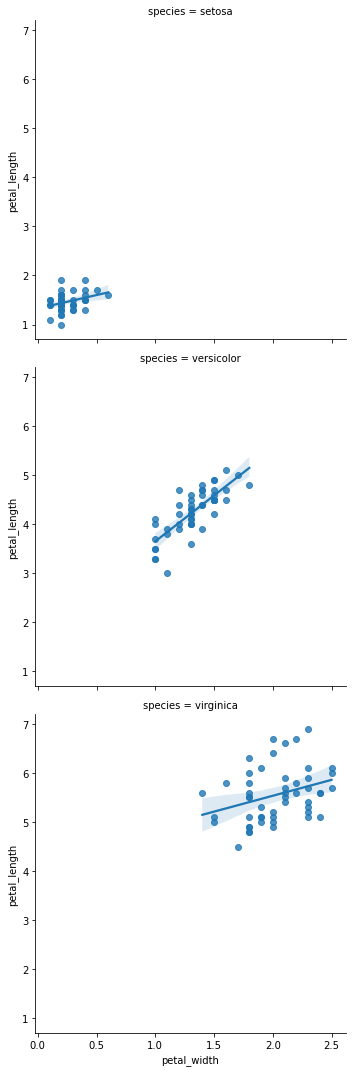

In [5]:
sns.lmplot(data=iris,x='petal_width',y="petal_length",row="species")
plt.show()

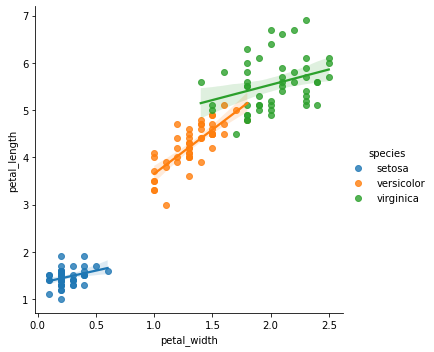

In [6]:
sns.lmplot(data=iris,x='petal_width',y="petal_length",hue="species")
plt.show()

### I want to `Facet` my figure, but...

**Problem:** The variable you want to facet/group by is 
- (A) continuous variable 
- or (B) a variable with too many values.

**Solutions:**
- (A) - partition/slice/factor your variable into bins using `panda`'s [`cut` function](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html).
- (B) - re-factor the variables into a smaller number of groups, or only graph some of them.

**For example:** Say you want to plot how age and death are related, and you want to plot this for healthy people and less-healthy people. So you collect the BMI of individuals in your sample. Let's say that BMI can take 25 values from 15 to 40. The problem is plotting 20 sub-figures is probably excessive. The solution is to use the `cut` function to create a new variable which is four bins of BMI [according to the UK's NHS](https://www.nhs.uk/common-health-questions/lifestyle/what-is-the-body-mass-index-bmi/): underweight (BMI<18.5), healthy (BMI 18.5-24.5), overweight (BMI 24.5-30), obese (BMI>30).

## Practice: Thinking and planning

**Questions:** Which type of graph (bar, line, or histogram) would you use?

1. The volume of apples picked at an orchard based on the type of apple (Granny Smith, Fuji, etcetera).
2. The number of points for each game in a basketball season for a team.
3. The count of apartment buildings in Chicago by the number of individual units.



**Answers**

```{dropdown} Q1
This is a nominal categorical example, and hence, a pretty straightforward bar graph target.
```
```{dropdown} Q2
This is a (nearly) continuous variable, with 82 observations (games). 82 bars is too much for a bar chart. But a line chart, histogram (or density plot), or boxplot would all work.
```
```{dropdown} Q3
Density chart would work, but you could also use a histogram as long as you "bin" apartment buildings (<10 units, 10-50 units, etc...) Note that this variable will be skewed because only a few buildings have 500+ units. 
```

